### **Object Detection using TensorFlow (SSD MobileNet)**
🔍 Project Overview

This project implements an object detection system using a pre-trained SSD MobileNet V2 model from TensorFlow Hub. The system detects multiple objects in an image, draws bounding boxes around them, and displays the predicted class labels along with confidence scores.

The model is trained on the COCO dataset, which contains 80 common object categories such as person, car, dog, chair, etc.

⚙️ Technologies Used

Python

TensorFlow

TensorFlow Hub

OpenCV

Matplotlib

Google Colab

🧠 How the Model Works

The input image is uploaded and converted into RGB format.

The image is transformed into a tensor and passed to the SSD MobileNet model.

The model outputs:

Bounding box coordinates

Detection confidence scores

Predicted class indices

Bounding boxes are drawn on objects with confidence greater than 50%.

The final image is displayed with labels and confidence scores.

📦 Model Details

Model: SSD MobileNet V2

Source: TensorFlow Hub

Dataset: COCO (Common Objects in Context)

Number of Classes: 80

🎯 Key Features

✔ Detects multiple objects in a single image
✔ Displays class labels and confidence scores
✔ Filters detections using confidence threshold
✔ Clean visualization with styled bounding boxes
✔ Fully implemented in Google Colab

🚀 Applications

Autonomous vehicles

Surveillance systems

Smart retail systems

Image search engines

AI-based monitoring systems

🔮 Future Improvements

While the current implementation successfully performs object detection using a pre-trained model, several enhancements can further improve the system:

🔹 Implement real-time webcam object detection

🔹 Add a dynamic confidence threshold slider

🔹 Integrate object tracking across video frames

🔹 Deploy as a web application using Streamlit or Flask

🔹 Optimize performance using TensorFlow Lite for mobile devices

🔹 Fine-tune the model on a custom dataset for domain-specific detection

🔹 Add object counting functionality

These improvements would make the system more interactive, scalable, and production-ready.

🧾 Conclusion

In this project, we implemented a complete object detection pipeline using TensorFlow and a pre-trained SSD MobileNet V2 model from TensorFlow Hub. The system processes input images, performs inference, and visualizes detected objects with bounding boxes and confidence scores.

This project demonstrates practical knowledge of computer vision, deep learning inference workflows, and model integration using TensorFlow in a real-world environment.

It serves as a strong foundation for building advanced AI-powered applications such as surveillance systems, autonomous systems, and intelligent monitoring tools.

🏗️ Project Architecture Diagram

```markdown
                ┌──────────────────┐
                │   Input Image    │
                └─────────┬────────┘
                          │
                          ▼
                ┌──────────────────┐
                │ Image Preprocess │
                │  (RGB Conversion)│
                └─────────┬────────┘
                          │
                          ▼
                ┌──────────────────┐
                │ Tensor Conversion│
                └─────────┬────────┘
                          │
                          ▼
                ┌──────────────────┐
                │ SSD MobileNet V2 │
                │ (TensorFlow Hub) │
                └─────────┬────────┘
                          │
        ┌─────────────────┼─────────────────┐
        ▼                 ▼                 ▼
Bounding Boxes      Confidence Scores   Class IDs
        └─────────────────┬─────────────────┘
                          ▼
                ┌──────────────────┐
                │ Draw Boxes + Text│
                └─────────┬────────┘
                          ▼
                ┌──────────────────┐
                │  Final Output    │
                │  (Displayed Img) │
                └──────────────────┘
```

In [16]:
!pip install tensorflow opencv-python


In [6]:
!pip install tensorflow tensorflow-hub


In [7]:
import tensorflow as tf
import tensorflow_hub as hub

print("Loading model...")

model = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

print("Model loaded successfully!")


Loading model...
Model loaded successfully!


In [17]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

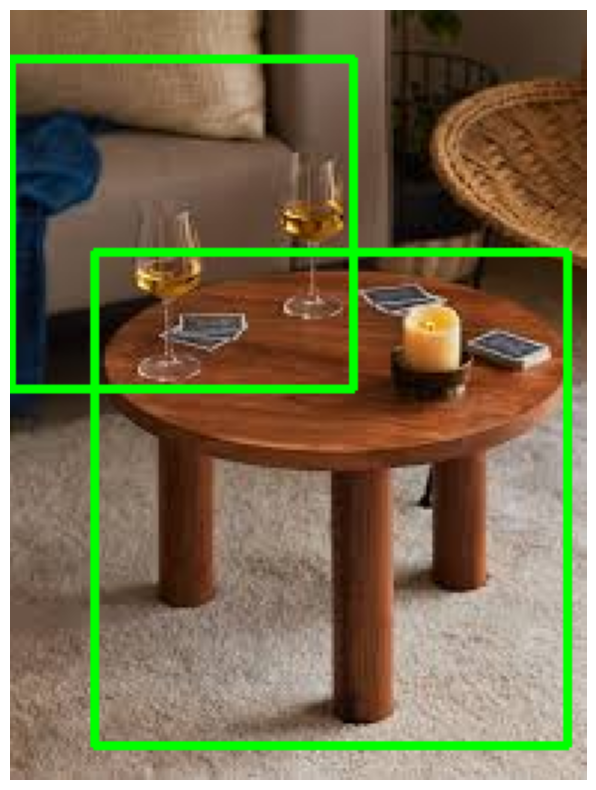

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
input_tensor = tf.convert_to_tensor(rgb_image)
input_tensor = input_tensor[tf.newaxis, ...]

outputs = model(input_tensor)

boxes = outputs["detection_boxes"][0].numpy()
scores = outputs["detection_scores"][0].numpy()

h, w, _ = rgb_image.shape

for i in range(len(scores)):
    if scores[i] > 0.5:
        y1, x1, y2, x2 = boxes[i]
        cv2.rectangle(rgb_image,
                      (int(x1*w), int(y1*h)),
                      (int(x2*w), int(y2*h)),
                      (0,255,0), 2)

plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.axis("off")
plt.show()
